# 실습1 - Credit 데이터


# **1-1. 필요한 라이브러리 불러오기**

In [4]:
# 라이브러리 loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1-2. Credit 데이터 불러오기**



In [5]:
# 데이터 loading
from google.colab import drive
drive.mount('/content/drive')

credit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Credit.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
credit

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0


# **1-3. 데이터 type 확인하기**

In [7]:
credit.dtypes

,0
Income,float64
Limit,int64
Rating,int64
Cards,int64
Age,int64
Education,int64
Own,object
Student,object
Married,object
Region,object


# **1-4. 데이터 통계 확인하기**

In [16]:
# 데이터 통계치 확인  # desclivbe : 숫자형태만 확인가능하다

#credit.describe()
credit.describe(include='all')

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student_dummy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,Yes,South,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000,0.900000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877,0.300376
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000,1.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000,1.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000,1.000000


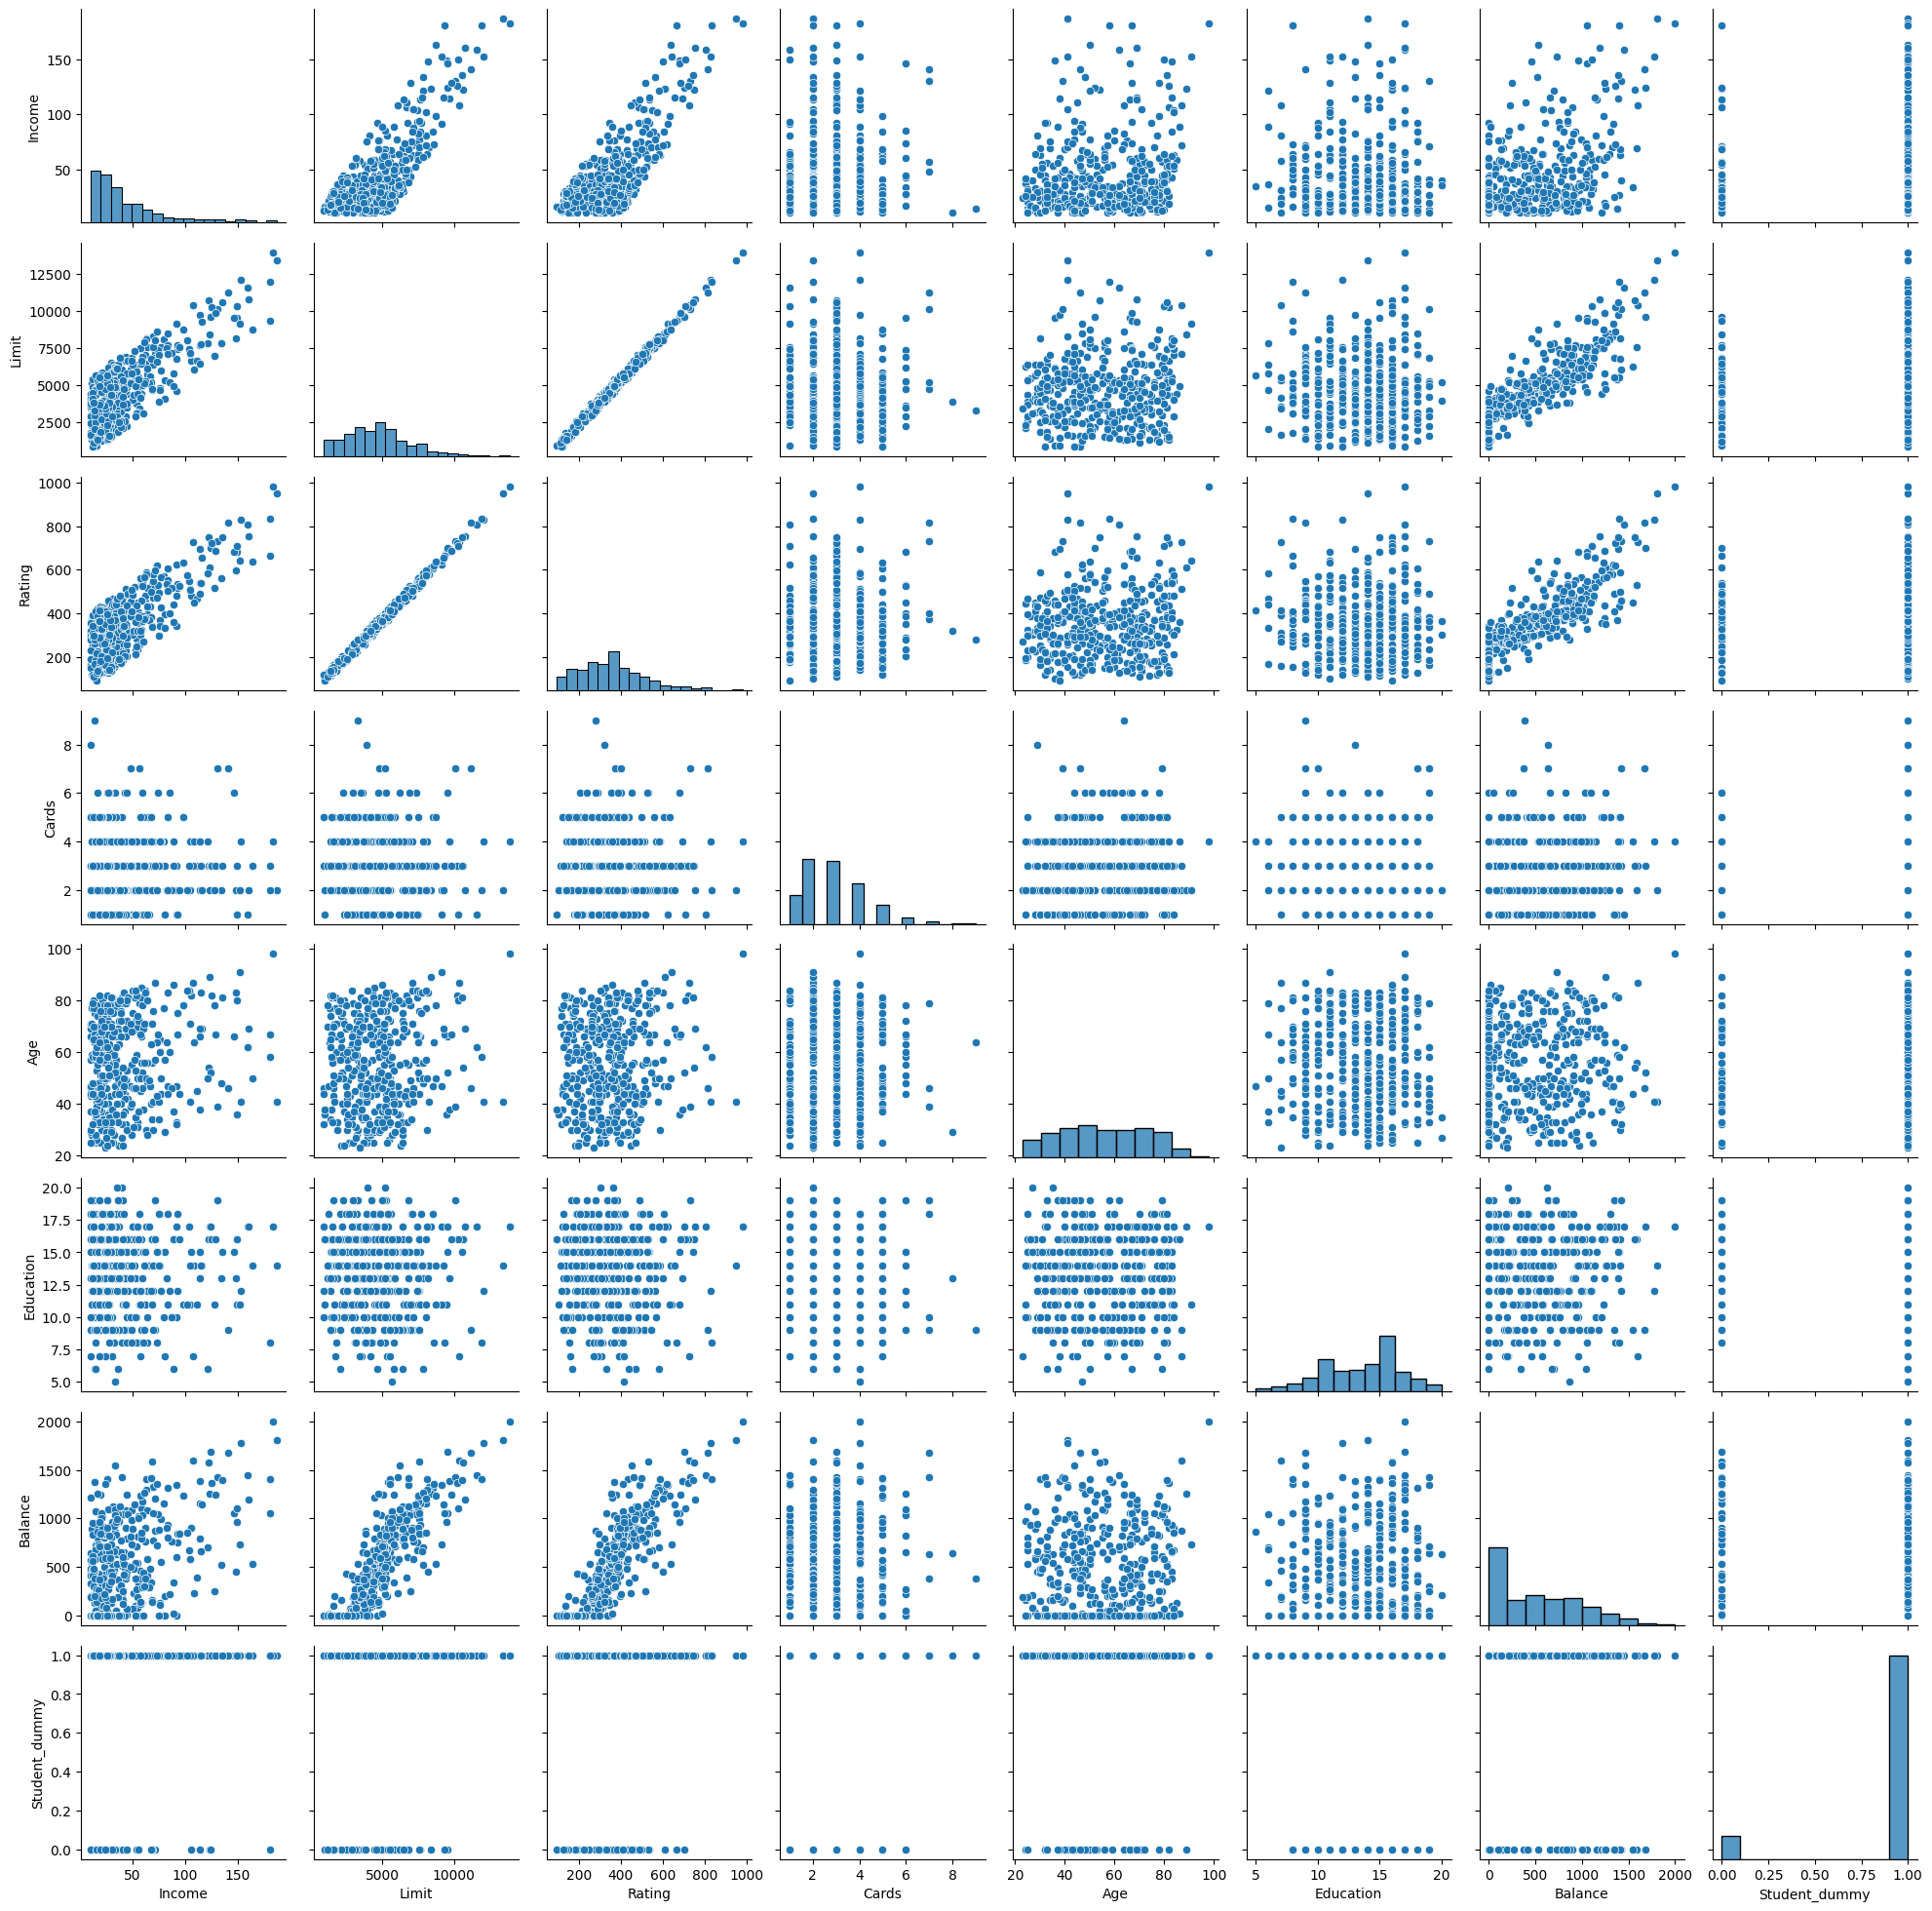

In [17]:
# scatter plot, histogram 확인하기
g = sns.PairGrid(credit)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# **1-5. Dummy 변수 생성**

In [14]:
# "Student" 컬럼을 문자("Yes", "No")에서 숫자(0, 1)로 변경("Student_dummy")
#credit["Student_dummy"]=credit["Student"].replace(to_replace="Yes",value=0)
credit["Student_dummy"]=credit["Student_dummy"].replace(to_replace="No",value=1)

/tmp/ipython-input-3904606888.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit["Student_dummy"]=credit["Student_dummy"].replace(to_replace="No",value=1)


In [15]:
credit

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance,Student_dummy
0,14.891,3606,283,2,34,11,No,No,Yes,South,333,1
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903,0
2,104.593,7075,514,4,71,11,No,No,No,West,580,1
3,148.924,9504,681,3,36,11,Yes,No,No,West,964,1
4,55.882,4897,357,2,68,16,No,No,Yes,South,331,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,No,No,Yes,South,560,1
396,13.364,3838,296,5,65,17,No,No,No,East,480,1
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138,1
398,37.728,2525,192,1,44,13,No,No,Yes,South,0,1


# **1-6. Balance와 Income, Student의 관계성 알아보기**

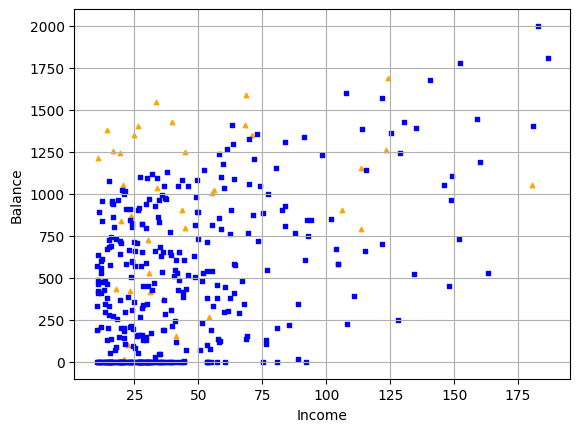

In [18]:
# Balance와 Income의 관계
fig, ax = plt.subplots()

income_student = credit[credit['Student'] == "Yes"]
income_non_student = credit[credit['Student'] == "No"]

ax.scatter(income_student["Income"], income_student["Balance"], s=10, marker="^", c="orange")
ax.scatter(income_non_student["Income"], income_non_student["Balance"], s=10, marker="s", c="blue")

ax.set(xlabel=("Income"),
       ylabel=("Balance"))

plt.grid()

plt.show()

<Axes: xlabel='Student', ylabel='Balance'>

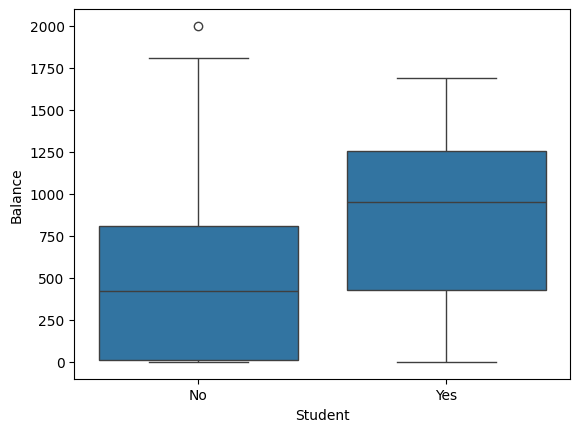

In [20]:
sns.boxplot(x=credit["Student"], y=credit["Balance"], data=credit)

# 실습2 - Auto 데이터

# **2-1. Auto 데이터 불러오기**

In [21]:
# 데이터 loading
auto = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Auto.csv")

In [22]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


from matplotlib import pyplot as plt
auto['mpg'].plot(kind='hist', bins=20, title='mpg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
auto['cylinders'].plot(kind='hist', bins=20, title='cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
auto['displacement'].plot(kind='hist', bins=20, title='displacement')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
auto['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
auto.plot(kind='scatter', x='mpg', y='cylinders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
auto.plot(kind='scatter', x='cylinders', y='displacement', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
auto.plot(kind='scatter', x='displacement', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
auto.plot(kind='scatter', x='weight', y='acceleration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['mpg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = auto.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('mpg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['cylinders']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = auto.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('cylinders')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['displacement']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = auto.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('displacement')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['weight']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = auto.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('weight')

from matplotlib import pyplot as plt
auto['mpg'].plot(kind='line', figsize=(8, 4), title='mpg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
auto['cylinders'].plot(kind='line', figsize=(8, 4), title='cylinders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
auto['displacement'].plot(kind='line', figsize=(8, 4), title='displacement')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
auto['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

# **2-2. 데이터 type 확인하기**

In [23]:
auto.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


# **2-3. 데이터 통계 확인하기**

In [24]:
# 데이터 통계치 확인
auto.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,397.000000,397.000000,397.000000,397,397.000000,397.000000,397.000000,397.000000,397
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,304
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.515869,5.458438,193.532746,NaN,2970.261965,15.555668,75.994962,1.574307,NaN
std,7.825804,1.701577,104.379583,NaN,847.904119,2.749995,3.690005,0.802549,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.000000,NaN,2223.000000,13.800000,73.000000,1.000000,NaN
50%,23.000000,4.000000,146.000000,NaN,2800.000000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3609.000000,17.100000,79.000000,2.000000,NaN


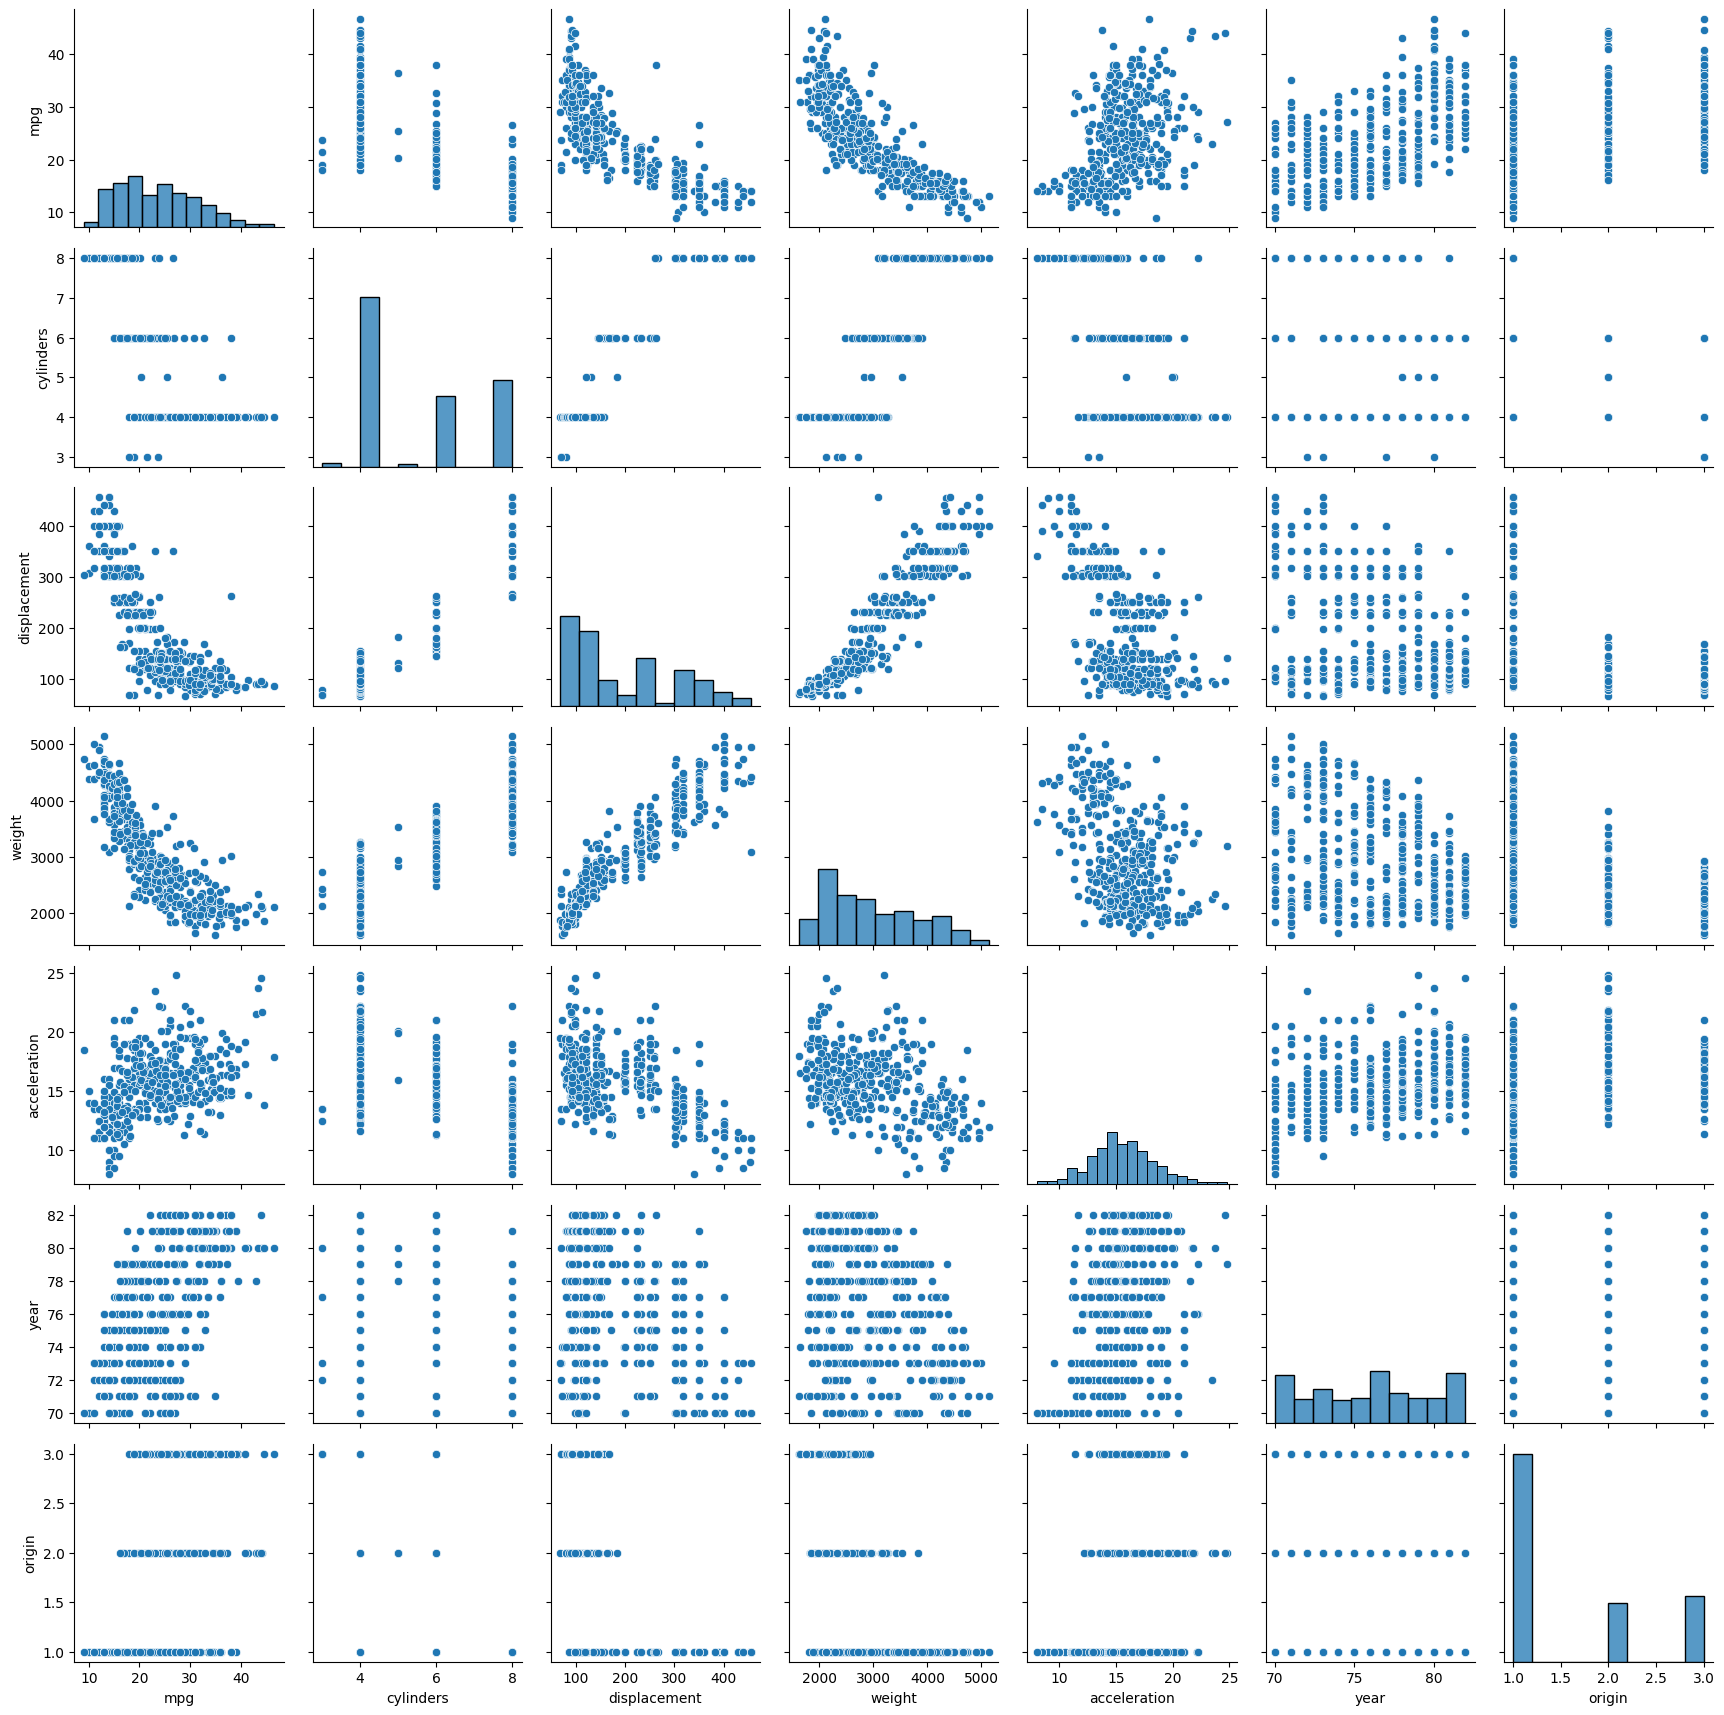

In [25]:
# scatter plot, histogram 확인하기
g = sns.PairGrid(auto)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# **2-4. 데이터 타입 변경**

In [29]:
# horserpower의 데이터 타입을 object에서 numeric으로 변경
auto["horsepower"] = pd.to_numeric(auto["horsepower"])

In [27]:
# horsepower의 ? 값을 0 으로 대체
auto["horsepower"]=auto["horsepower"].replace(to_replace="?",value=0)

In [28]:
auto.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
year,int64
origin,int64
name,object


# **2-5. mpg와 horsepower의 관계성 알아보기**

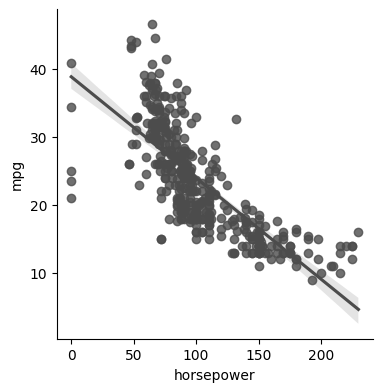

In [30]:
g = sns.PairGrid(auto, y_vars=["mpg"], x_vars=["horsepower"], height=4)
g.map(sns.regplot, color=".3")

# 실습3 - Income 데이터


# **3-1. Income 데이터 불러오기**

In [36]:
# 데이터 loading
#income = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Income.csv")
income = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Income.csv", index_col=0)

In [37]:
income

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
10,100.000000,113.103448,45.655530


# **3-2. 데이터 type 확인하기**

In [38]:
income.dtypes

,0
Education,float64
Seniority,float64
Income,float64


# **3-3. 데이터 통계 확인하기**

In [39]:
# 데이터 통계치 확인
income.describe(include='all')

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,19.386207,93.862069,62.744733
std,15.648716,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,13.827586,44.827586,36.392043
50%,17.241379,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,100.000000,187.586207,99.917173


from matplotlib import pyplot as plt
_df_8['Education'].plot(kind='hist', bins=20, title='Education')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Seniority'].plot(kind='hist', bins=20, title='Seniority')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='Education', y='Seniority', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Seniority', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Education'].plot(kind='line', figsize=(8, 4), title='Education')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Seniority'].plot(kind='line', figsize=(8, 4), title='Seniority')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Income'].plot(kind='line', figsize=(8, 4), title='Income')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Education', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Seniority', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Income', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

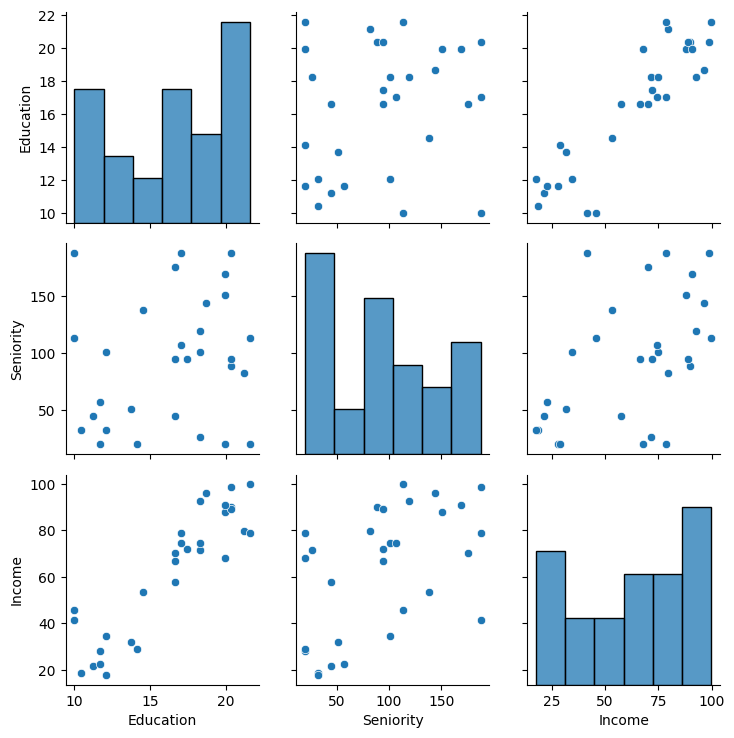

In [43]:
# scatter plot, histogram 확인하기
g = sns.PairGrid(income)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# **3-4. 이상치(outlier) 수정/삭제하기**

In [41]:
# 값 변경
income.loc[10, "Education"] = 10

In [45]:
# row 삭제
income = income.drop([10])

In [46]:
income

,Education,Seniority,Income
1,21.586207,113.103448,99.917173
2,18.275862,119.310345,92.579135
3,12.068966,100.689655,34.678727
4,17.034483,187.586207,78.702806
5,19.931034,20.000000,68.009922
6,18.275862,26.206897,71.504485
7,19.931034,150.344828,87.970467
8,21.172414,82.068966,79.811030
9,20.344828,88.275862,90.006327
11,13.724138,51.034483,31.913808


# **3-5. Income과 education, seniority의 관계성 알아보기**

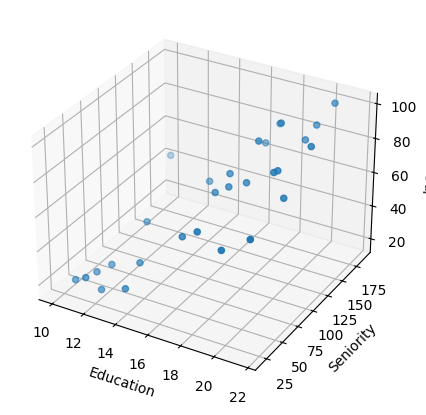

In [51]:
plt.figure(figsize=(6,5))

axes = plt.axes(projection='3d')
axes.scatter3D(income["Education"], income["Seniority"], income["Income"])

axes.set_xlabel('Education')
axes.set_ylabel('Seniority')
axes.set_zlabel('Income')
plt.show()